<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/SpaceVector_ThreePhaseWithThirdHarmonic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Space Vector of Sinusoidal Three-Phase Variables with Third Harmonic</h1></b>

Dr. Bingsen Wang

7/12/2024
</center>

#Space Vector

The space vector is complex variable defined as
$$\underline f = {2\over3}\left(f_a + f_be^{j\frac{2\pi}{3}} + f_ce^{j\frac{4\pi}{3}}\right)\tag{1}$$
where $f_a,f_b,f_c$ are the three-phase variables. In electrical systems, the variable $f$ can be voltage $v$, current $i$, or flux linkage $\lambda$. In power electronics systems, the variable $f$ can be the modulation function or switching function.

#Python Code
The Python code illustrates the space vector of unbalanced three-phase variables that contain the fundamental component and third harmonics.

0
0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
0


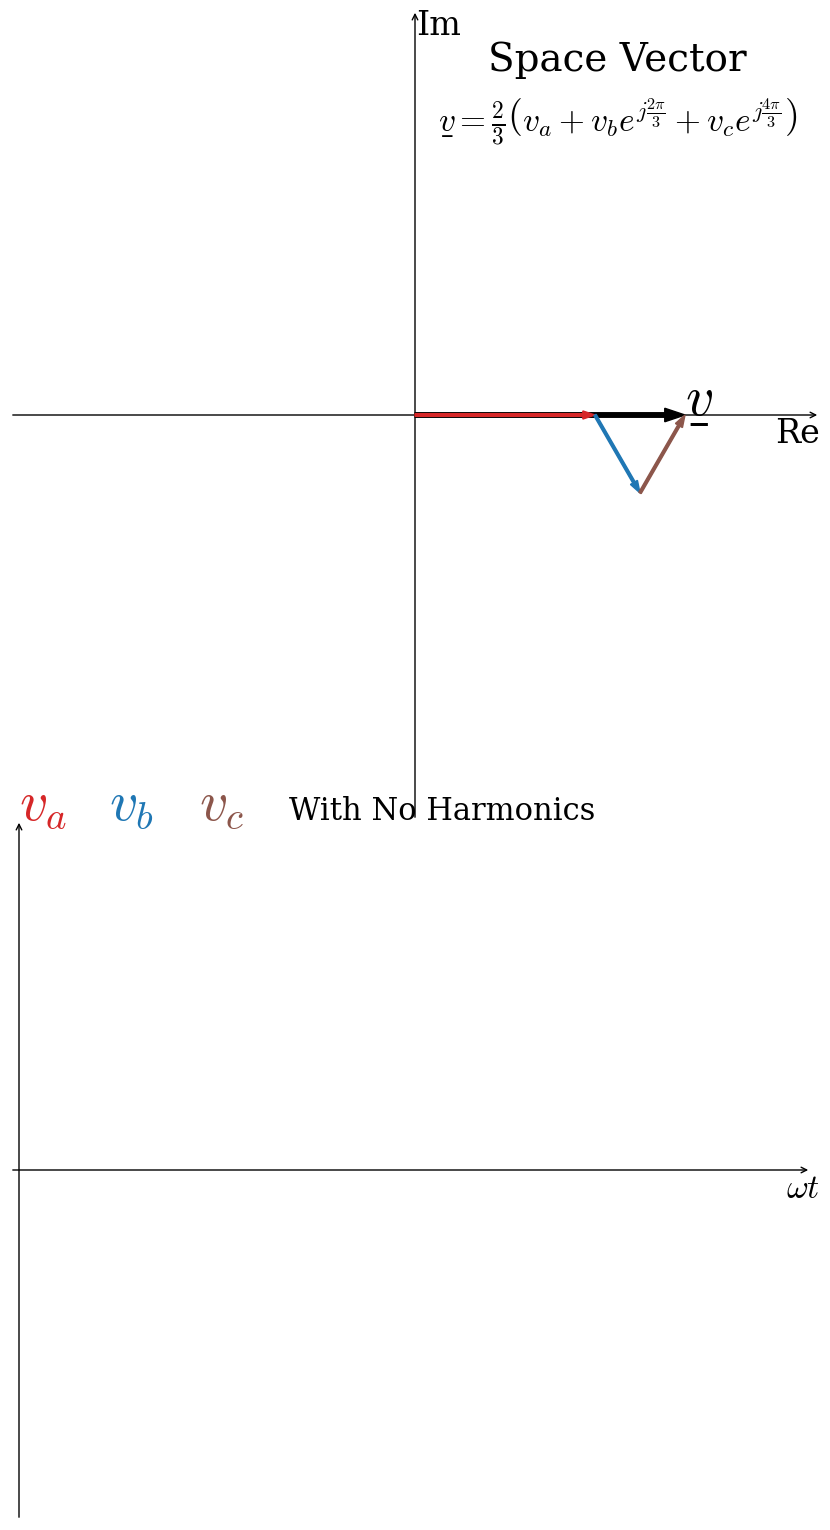

In [ ]:
import matplotlib
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

#parameters
Nf = 600
f = 1 #frequency in Hz
T = 1/f #period

t=linspace(0,T,int(Nf/2))
wt = 2*pi*f*t
V = 3 #voltage in V
theta=0
va1=V*cos(wt+theta)
vb1=V*cos(wt+theta-2*pi/3)
vc1=V*cos(wt+theta-4*pi/3)
v_sv1 = 2/3*(va1+vb1*exp(1j*2*pi/3)+vc1*exp(1j*4*pi/3))

v3=-V/6*cos(3*(wt+theta)) #third harmonic
va2 = va1+v3
vb2 = vb1+v3
vc2 = vc1+v3
v_sv2 = 2/3*(va2+vb2*exp(1j*2*pi/3)+vc2*exp(1j*4*pi/3))

xymax = 4.5
clst=['tab:red', 'tab:blue', 'tab:brown']
fig = plt.figure(figsize=(9,16))
fig.tight_layout()
ax=fig.add_axes((0.05,7/16,.9,.9*9/16),xlim=[-xymax,xymax], ylim=[-xymax,xymax],fc='none') #no fc
ax0=fig.add_axes((0.05,7/16,.9,.9*9/16),xlim=[-xymax,xymax], ylim=[-xymax,xymax],fc='none') #no fc for animated parts
ax1=fig.add_axes((0.05,0,.9,7/16),xlim=[-.1,2*xymax-.1], ylim=[-xymax*7/9,xymax*7/9],fc='none') #no fc
ax.axis('off') #turn off axis frames
ax1.axis('off') #turn off axis frames
ax.annotate("", (xymax, 0), (-xymax, 0),arrowprops={'arrowstyle':"->"}) #x-axis for space vector
ax.annotate("", (0,xymax), (0,-xymax),arrowprops={'arrowstyle':"->"}) #y-axis for space vector
ax1.annotate("", (2*xymax-.2, 0), (-.1, 0),arrowprops={'arrowstyle':"->"}) #x-axis for voltages
ax1.annotate("", (0,xymax*7/9), (0,-xymax*7/9),arrowprops={'arrowstyle':"->"}) #y-axis for voltages
ax.text(xymax,-.03,'Re',size=24,va='top',ha='right') #x-axis label
ax.text(0.01,xymax,'Im',size=24,va='top') #y label
ax.text(xymax*.5,xymax*.85,'Space Vector',size=28,ha='center')
ax.text(xymax*.5,xymax*.7,r'$v\underbar = \frac{2}{3}\left(v_a + v_b e^{j\frac{2\pi}{3}}+ v_c e^{j\frac{4\pi}{3}}\right)$',
        size=24,ha='center')


lines = [] #array containing all the line segments
lines.append(ax.plot([], [], '-', lw=5, color='tab:orange')[0]) #v_sv trajectory
lines.append(ax1.plot([], [], '-', lw=5, color=clst[0])[0]) #v_a
lines.append(ax1.plot([], [], '-', lw=5, color=clst[1])[0]) #v_b
lines.append(ax1.plot([], [], '-', lw=5, color=clst[2])[0]) #v_c
ax1.text(0,xymax*7/9,r'$v_a$',size=40,color=clst[0]) #va label
ax1.text(1,xymax*7/9,r'$v_b$',size=40,color=clst[1]) #vb label
ax1.text(2,xymax*7/9,r'$v_c$',size=40,color=clst[2]) #vc label
text_waveforms=ax1.text(3,xymax*7/9,r'',size=22)

ax1.text(2*xymax-.1,-.03,r'$\omega t$',size=24,va='top',ha='right') #x-axis label

def drawVectors(ax,xymax,v_sv,vabc,clst):
  theta = np.angle(v_sv)
  if theta<0:
    theta = 2*pi+theta
  ax.clear()
  ax.set_xlim([-xymax,xymax])
  ax.set_ylim([-xymax,xymax])
  ax.axis('off')
  arr = mp.FancyArrow(0,0,v_sv.real, v_sv.imag, width=.05,length_includes_head=True,
                   color='k') #space vector v_sv
  ax.add_patch(arr)
  for i in range(3):
    v=0
    for ii in range(i):
      v+=vabc[ii]*exp(1j*2*pi/3**ii)*2/3
    arr = mp.FancyArrow(v.real,v.imag,(vabc[i]*exp(1j*i*2*pi/3)).real*2/3, (vabc[i]*exp(1j*i*2*pi/3)).imag*2/3, width=.03,length_includes_head=True,
                   color=clst[i]) #v_a,v_b,v_c
    ax.add_patch(arr)
  t1 = ax.text(v_sv.real,v_sv.imag,r'$v\underbar$', size = 40)
  if theta>pi/2 and theta<3*pi/2:
    t1.set_ha('right')
  if theta>pi:
    t1.set_va('top')
  return

# animation function. This is called sequentially
def animate(ii):
  if ii%30==0: #for monitoring the progress
    print(ii)
  # ii=299
  if int(ii/300)==0:
    va = va1
    vb = vb1
    vc = vc1
    v_sv = v_sv1
    text_waveforms.set_text('With No Harmonics')
  else:
    va = va2
    vb = vb2
    vc = vc2
    v_sv = v_sv2
    text_waveforms.set_text('With Third Harmonics')

  i=ii%300


  #plot
  lines[0].set_data(v_sv[:i].real,v_sv[:i].imag) #v_sv trajectory
  lines[1].set_data(t[:i]/T*xymax*1.9,va[:i]) #v_a
  lines[2].set_data(t[:i]/T*xymax*1.9,vb[:i]) #v_b
  lines[3].set_data(t[:i]/T*xymax*1.9,vc[:i]) #v_c
  drawVectors(ax0,xymax,v_sv[i],[va[i],vb[i],vc[i]],clst)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
fn = r"SpaceVector_ThirdHarmonic.mp4"
writervideo = animation.FFMpegWriter(fps=30)
anim.save(fn, writer=writervideo,dpi = 200)